In [13]:
pip install yfinance


In [14]:
!pip install neuralprophet

In [15]:
from neuralprophet import NeuralProphet
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
stock='msft'
start_date='2015-01-01'
end_date= '2023-12-20'
stock_data= yf.download(stock, start=start_date, end=end_date)
print(stock_data)
stock_data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02   46.660000   47.419998   46.540001   46.759998   40.452732   
2015-01-05   46.369999   46.730000   46.250000   46.330002   40.080742   
2015-01-06   46.380001   46.750000   45.540001   45.650002   39.492466   
2015-01-07   45.980000   46.459999   45.490002   46.230000   39.994232   
2015-01-08   46.750000   47.750000   46.720001   47.590000   41.170784   
...                ...         ...         ...         ...         ...   
2023-12-13  376.019989  377.640015  370.769989  374.369995  374.369995   
2023-12-14  373.309998  373.760010  364.130005  365.929993  365.929993   
2023-12-15  366.850006  372.399994  366.279999  370.730011  370.730011   
2023-12-18  369.450012  373.000000  368.679993  372.649994  372.649994   
2023-12-19  371.489990  373.260010  369.839

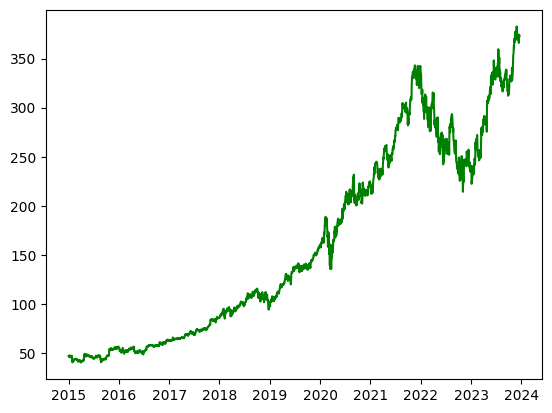

In [21]:
stocks=pd.read_csv('stock_data.csv')
stocks['Date']=pd.to_datetime(stocks['Date'])
stocks=stocks[['Date', 'Close']]
stocks.columns = ['ds', 'y']
plt.plot(stocks['ds'], stocks['y'], label='actual', c='g')
plt.show()

In [22]:
model=NeuralProphet()
model.fit(stocks)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.367% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.367% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.co

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,263.393829,329.781860,0.406332,0.0,0
1,248.953506,312.851715,0.371092,0.0,1
2,232.267822,292.575073,0.331239,0.0,2
3,210.027237,265.170837,0.280347,0.0,3
4,183.741043,233.711731,0.222838,0.0,4
...,...,...,...,...,...
147,12.295576,18.976191,0.002107,0.0,147
148,12.200685,19.021498,0.002106,0.0,148
149,12.172744,18.863201,0.002097,0.0,149
150,12.184695,18.880859,0.002097,0.0,150


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.367% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.367% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 71it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.367% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.367% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.367% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.367% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 71it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


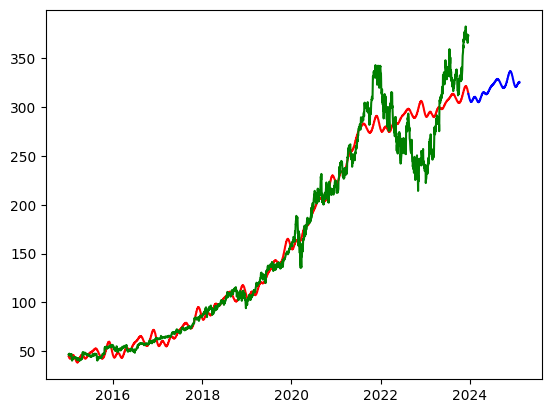

In [24]:
future = model.make_future_dataframe(stocks, periods=300)
forecast = model.predict(future)
actual_prediction= model.predict(stocks)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label='future_prediction', c='r')
plt.plot(forecast['ds'], forecast['yhat1'], label='future_prediction', c='b')
plt.plot(stocks['ds'], stocks['y'], label='actual', c='g')

plt.show()

In [25]:
model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
